In [2]:
# Do the necessary imports
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector

In [21]:
# this block only needs to be run once

# from qiskit import IBMQ
# IBMQ.save_account('2295eb6b30c26aecc9b9ecb0677b769a8e3a606479658709d13cd7301349ce07965760ac5eeb2fbb1e9cb741bdfc881058301125aaa6e1a703beedc07bb9db94')

# provider = IBMQ.load_account()
# backend = provider.get_backend('ibmq_quito')

configrc.store_credentials:WARNING:2022-04-18 23:25:13,610: Credentials already present. Set overwrite=True to overwrite.


In [4]:
# superposition, simulate all vectors in R^n

def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

In [5]:
# diffuser

def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

In [6]:
# oracle

def binary_z_oracle(n_qubit):
    qc = QuantumCircuit(3)

    # for qubit in range(n_quibit - 1):
        
    


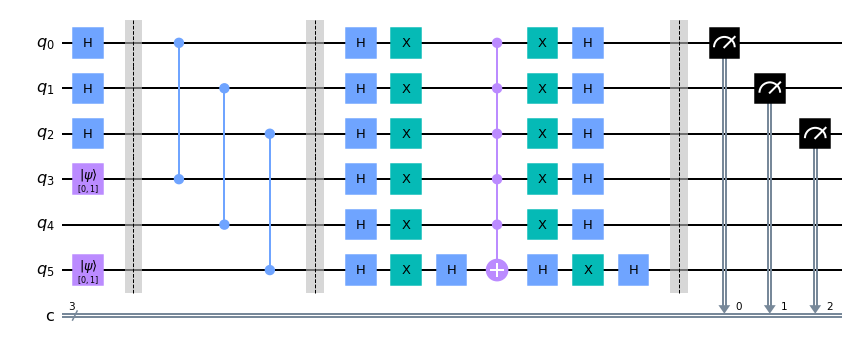

In [47]:
n = 3

tc = QuantumCircuit(n*2,n)


initialize_s(tc, [0,1,2])

tc.initialize([0,1], 3)
tc.initialize([0,1], 5)

tc.barrier()

tc.cz(3,0)
tc.cz(4,1)
tc.cz(5,2)

tc.barrier()


################## DIFFUSING #################
m = 2*n
for i in range(1):
    for qubit in range(m):
        tc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(m):
        tc.x(qubit)
    # Do multi-controlled-Z gate
    tc.h(m-1)
    tc.mct(list(range(m-1)), m-1)  # multi-controlled-toffoli
    tc.h(m-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(m):
        tc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(m):
        tc.h(qubit)

################## DIFFUSING #################


tc.barrier()

tc.measure(0,0)
tc.measure(1,1)
tc.measure(2,2)


tc.draw('mpl')

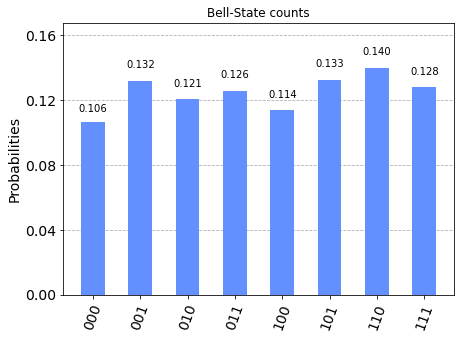

In [48]:
sim = Aer.get_backend('aer_simulator')
tc.save_statevector()

result = sim.run(tc).result()
counts = result.get_counts(tc)
plot_histogram(counts, title='Bell-State counts')

In [55]:
nqubits = 3

qc = QuantumCircuit(nqubits)
# Apply transformation |s> -> |00..0> (H-gates)
for qubit in range(nqubits):
    qc.h(qubit)
# Apply transformation |00..0> -> |11..1> (X-gates)
for qubit in range(nqubits):
    qc.x(qubit)
# Do multi-controlled-Z gate
qc.h(nqubits-1)
qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
qc.h(nqubits-1)
# Apply transformation |11..1> -> |00..0>
for qubit in range(nqubits):
    qc.x(qubit)
# Apply transformation |00..0> -> |s>
for qubit in range(nqubits):
    qc.h(qubit)
# We will return the diffuser as a gate


qc.draw()
# print(qc.qasm())

┌───┐┌───┐          ┌───┐┌───┐     
q_0: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐
q_2: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘